In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (8,5)

# Import netcdf

In [3]:
ctd = xr.open_dataset('74JC20150110.nc')

In [4]:
ctd

<xarray.Dataset>
Dimensions:          (N_level: 2418, N_profile: 30)
Coordinates:
  * N_profile        (N_profile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
  * N_level          (N_level) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
Data variables:
    EXPOCODE         (N_profile) object ...
    SECT_ID          (N_profile) object ...
    STNNBR           (N_profile) object ...
    CASTNO           (N_profile) object ...
    DATE             (N_profile) object ...
    TIME             (N_profile) object ...
    LATITUDE         (N_profile) float64 ...
    LONGITUDE        (N_profile) float64 ...
    DEPTH            (N_profile) float64 ...
    DATETIME         (N_profile) datetime64[ns] ...
    CTDPRS           (N_profile, N_level) float64 ...
    CTDPRS_FLAG_W    (N_profile, N_level) float32 ...
    CTDTMP           (N_profile, N_level) float64 ...
    CTDTMP_FLAG_W    (N_profile, N_level) float32 ...
    CTDSAL           (N_profile, N_level) float64 ...
    CTDSAL_FLAG_W    

In [5]:
ctd2 = xr.open_dataset('74JC20150110.nc', decode_cf=False)
ctd2

<xarray.Dataset>
Dimensions:          (N_level: 2418, N_profile: 30)
Coordinates:
  * N_profile        (N_profile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
  * N_level          (N_level) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
Data variables:
    EXPOCODE         (N_profile) object ...
    SECT_ID          (N_profile) object ...
    STNNBR           (N_profile) object ...
    CASTNO           (N_profile) object ...
    DATE             (N_profile) object ...
    TIME             (N_profile) object ...
    LATITUDE         (N_profile) float64 ...
    LONGITUDE        (N_profile) float64 ...
    DEPTH            (N_profile) float64 ...
    DATETIME         (N_profile) int64 ...
    CTDPRS           (N_profile, N_level) float64 ...
    CTDPRS_FLAG_W    (N_profile, N_level) int8 ...
    CTDTMP           (N_profile, N_level) float64 ...
    CTDTMP_FLAG_W    (N_profile, N_level) int8 ...
    CTDSAL           (N_profile, N_level) float64 ...
    CTDSAL_FLAG_W    (N_profile, N_l

In [6]:
pressure_flag = ctd['CTDPRS_FLAG_W']
pressure_flag

<xarray.DataArray 'CTDPRS_FLAG_W' (N_profile: 30, N_level: 2418)>
array([[ 2.,  2.,  2., ..., nan, nan, nan],
       [ 2.,  2.,  2., ..., nan, nan, nan],
       [ 2.,  2.,  2., ..., nan, nan, nan],
       ...,
       [ 2.,  2.,  2., ..., nan, nan, nan],
       [ 2.,  2.,  2., ..., nan, nan, nan],
       [ 2.,  2.,  2., ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * N_profile  (N_profile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * N_level    (N_level) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...

In [7]:
pressure_flag.encoding

{'zlib': False,
 'shuffle': False,
 'complevel': 0,
 'fletcher32': False,
 'contiguous': True,
 'chunksizes': None,
 'source': '/Users/merchant/Work/process_cchdo_data/exchange_ctd/scripts/process_exchange_ctd_netcdf/jupyter_notebook/74JC20150110.nc',
 'original_shape': (30, 2418),
 'dtype': dtype('int8'),
 '_FillValue': 9}

In [8]:
pressure_flag2 = ctd2['CTDPRS_FLAG_W']
pressure_flag2

<xarray.DataArray 'CTDPRS_FLAG_W' (N_profile: 30, N_level: 2418)>
array([[2, 2, 2, ..., 9, 9, 9],
       [2, 2, 2, ..., 9, 9, 9],
       [2, 2, 2, ..., 9, 9, 9],
       ...,
       [2, 2, 2, ..., 9, 9, 9],
       [2, 2, 2, ..., 9, 9, 9],
       [2, 2, 2, ..., 9, 9, 9]], dtype=int8)
Coordinates:
  * N_profile  (N_profile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * N_level    (N_level) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Attributes:
    _FillValue:  9

In [9]:
pressure_flag2.encoding

{'zlib': False,
 'shuffle': False,
 'complevel': 0,
 'fletcher32': False,
 'contiguous': True,
 'chunksizes': None,
 'source': '/Users/merchant/Work/process_cchdo_data/exchange_ctd/scripts/process_exchange_ctd_netcdf/jupyter_notebook/74JC20150110.nc',
 'original_shape': (30, 2418),
 'dtype': dtype('int8')}

In [10]:
stnbr = ctd['STNNBR']
stnbr

<xarray.DataArray 'STNNBR' (N_profile: 30)>
array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30'], dtype=object)
Coordinates:
  * N_profile  (N_profile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Attributes:
    units:      number
    long_name:  Station Number

In [11]:
stnbr.encoding

{'zlib': False,
 'shuffle': False,
 'complevel': 0,
 'fletcher32': False,
 'contiguous': True,
 'chunksizes': None,
 'source': '/Users/merchant/Work/process_cchdo_data/exchange_ctd/scripts/process_exchange_ctd_netcdf/jupyter_notebook/74JC20150110.nc',
 'original_shape': (30,),
 'dtype': str}

In [12]:
pressure = ctd['CTDPRS']
pressure

<xarray.DataArray 'CTDPRS' (N_profile: 30, N_level: 2418)>
array([[ 3.,  5.,  7., ..., nan, nan, nan],
       [ 3.,  5.,  7., ..., nan, nan, nan],
       [ 3.,  5.,  7., ..., nan, nan, nan],
       ...,
       [ 5.,  7.,  9., ..., nan, nan, nan],
       [ 7.,  9., 11., ..., nan, nan, nan],
       [ 7.,  9., 11., ..., nan, nan, nan]])
Coordinates:
  * N_profile  (N_profile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * N_level    (N_level) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Attributes:
    units:    DBAR

In [13]:
ctd_prof_4 = ctd['CTDPRS'].sel(N_profile = 4)
ctd_prof_4

<xarray.DataArray 'CTDPRS' (N_level: 2418)>
array([ 3.,  5.,  7., ..., nan, nan, nan])
Coordinates:
    N_profile  int64 4
  * N_level    (N_level) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Attributes:
    units:    DBAR

In [14]:
expocode = ctd['EXPOCODE']
expocode

<xarray.DataArray 'EXPOCODE' (N_profile: 30)>
array(['74JC20150110', '74JC20150110', '74JC20150110', '74JC20150110',
       '74JC20150110', '74JC20150110', '74JC20150110', '74JC20150110',
       '74JC20150110', '74JC20150110', '74JC20150110', '74JC20150110',
       '74JC20150110', '74JC20150110', '74JC20150110', '74JC20150110',
       '74JC20150110', '74JC20150110', '74JC20150110', '74JC20150110',
       '74JC20150110', '74JC20150110', '74JC20150110', '74JC20150110',
       '74JC20150110', '74JC20150110', '74JC20150110', '74JC20150110',
       '74JC20150110', '74JC20150110'], dtype=object)
Coordinates:
  * N_profile  (N_profile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Attributes:
    long_name:  Expocode

In [15]:
latitude = ctd['LATITUDE']
latitude

<xarray.DataArray 'LATITUDE' (N_profile: 30)>
array([-61.05073, -60.981  , -60.84999, -60.83309, -60.80038, -60.66733,
       -60.3322 , -60.00063, -59.66621, -59.33228, -59.00116, -58.68335,
       -58.36496, -58.05   , -57.73333, -57.41778, -57.09924, -56.78214,
       -56.46863, -56.1688 , -55.83152, -55.51735, -55.21275, -55.1698 ,
       -55.12046, -55.06996, -55.00685, -54.97763, -54.90397, -54.73745])
Coordinates:
  * N_profile  (N_profile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Attributes:
    units:          degrees_north
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y

# Plot first xarray set for expocode = 33HQ20150809

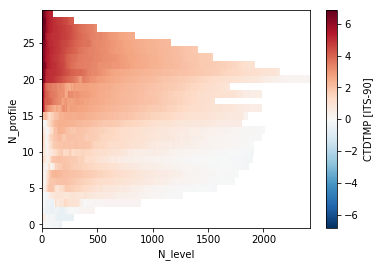

In [16]:
ctd['CTDTMP'].plot()

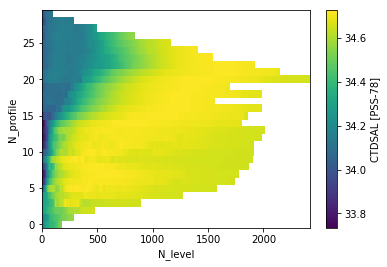

In [17]:
ctd['CTDSAL'].plot()

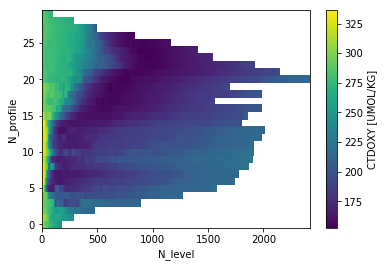

In [18]:
ctd['CTDOXY'].plot()

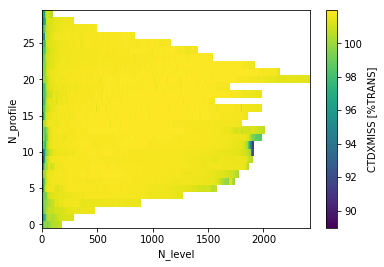

In [19]:
ctd['CTDXMISS'].plot()

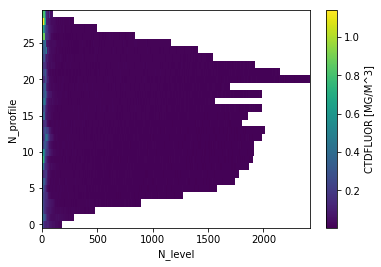

In [20]:
ctd['CTDFLUOR'].plot()

## Add attributes to variables

In [25]:
ctd['CTDPRS'].attrs = {'creator_name': 'Sample Name'}
ctd

<xarray.Dataset>
Dimensions:          (N_level: 2418, N_profile: 30)
Coordinates:
  * N_profile        (N_profile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
  * N_level          (N_level) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
Data variables:
    EXPOCODE         (N_profile) object '74JC20150110' '74JC20150110' ...
    SECT_ID          (N_profile) object ...
    STNNBR           (N_profile) object '1' '2' '3' '4' '5' '6' '7' '8' '9' ...
    CASTNO           (N_profile) object ...
    DATE             (N_profile) object ...
    TIME             (N_profile) object ...
    LATITUDE         (N_profile) float64 -61.05 -60.98 -60.85 -60.83 -60.8 ...
    LONGITUDE        (N_profile) float64 ...
    DEPTH            (N_profile) float64 ...
    DATETIME         (N_profile) datetime64[ns] ...
    CTDPRS           (N_profile, N_level) float64 3.0 5.0 7.0 9.0 11.0 13.0 ...
    CTDPRS_FLAG_W    (N_profile, N_level) float32 2.0 2.0 2.0 2.0 2.0 2.0 ...
    CTDTMP           (N_profile, 

# Save to new netcdf file with added attributes

In [26]:
ctd.to_netcdf('new_file.nc')